In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/costa-rican-household-poverty-prediction/sample_submission.csv
/kaggle/input/costa-rican-household-poverty-prediction/codebook.csv
/kaggle/input/costa-rican-household-poverty-prediction/train.csv.zip
/kaggle/input/costa-rican-household-poverty-prediction/sample_submission.csv.zip
/kaggle/input/costa-rican-household-poverty-prediction/codebook.xlsx
/kaggle/input/costa-rican-household-poverty-prediction/train.csv
/kaggle/input/costa-rican-household-poverty-prediction/test.csv
/kaggle/input/costa-rican-household-poverty-prediction/test.csv.zip


In [ ]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None) 
# # 말줄임표 대신 값이 다 보이게 함

## 데이터 단계

In [ ]:
train= pd.read_csv('/kaggle/input/costa-rican-household-poverty-prediction/train.csv')
test= pd.read_csv('/kaggle/input/costa-rican-household-poverty-prediction/test.csv')
train.shape, test.shape

((9557, 143), (23856, 142))

In [ ]:
train.describe(include='all')

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9557,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
unique,9557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_ef5ba3988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,NaN,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,NaN,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,NaN,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,NaN,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,NaN,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [ ]:
# False-> 0, True-> 1
train.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [ ]:
train= train.dropna(axis= 'columns')
# null컬럼 삭제
train.columns, len(train.columns)

(Index(['Id', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1',
        'r4h2', 'r4h3',
        ...
        'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'agesq', 'Target'],
       dtype='object', length=138),
 138)

In [ ]:
train.isnull().sum()
# null이 삭제됨

Id                 0
hacdor             0
rooms              0
hacapo             0
v14a               0
                  ..
SQBhogar_nin       0
SQBovercrowding    0
SQBdependency      0
agesq              0
Target             0
Length: 138, dtype: int64

refrig, tamhog, hhsize, public, idhogar, dependency, hogar_total, overcrowding, bedrooms, agesq, Target 


In [ ]:
train_feature= train[['refrig', 'tamhog', 'hhsize', 'public', 'idhogar', 'dependency', 
       'hogar_total', 'overcrowding', 'bedrooms', 'agesq']]
train_feature.info()
# float 1, int 7, object 2개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   refrig        9557 non-null   int64  
 1   tamhog        9557 non-null   int64  
 2   hhsize        9557 non-null   int64  
 3   public        9557 non-null   int64  
 4   idhogar       9557 non-null   object 
 5   dependency    9557 non-null   object 
 6   hogar_total   9557 non-null   int64  
 7   overcrowding  9557 non-null   float64
 8   bedrooms      9557 non-null   int64  
 9   agesq         9557 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 746.8+ KB


In [ ]:
train_feature.head(3)

,refrig,tamhog,hhsize,public,idhogar,dependency,hogar_total,overcrowding,bedrooms,agesq
0,1,1,1,1,21eb7fcc1,no,1,1.0,1,1849
1,1,1,1,1,0e5d7a658,8,1,1.0,1,4489
2,1,1,1,1,2c7317ea8,8,1,0.5,2,8464


### 연속형? 분류형? 확인하기
- 연속형: refrig, public, dependency, overcrowding, bedrooms
- 분류형: tamhog, hhsize, hogar_total
- 대상에서 제외(난해한 것): idhogar, agesq

- 소수점, 개수, 수치적인 의미를 가짐-> 연속형
- refrig가 냉장고 대수를 새는 구나~ 하는걸 알면 연속형이구나 알수있고  refrig2000년식 refrig2002년식 refrig2003년식 이런식으로 분류가 되면 분류형이구나~

In [ ]:
train_feature['refrig'].value_counts()

1    9152
0     405
Name: refrig, dtype: int64

In [ ]:
train_feature= train_feature[['refrig', 'public', 'dependency', 'overcrowding', 
                'bedrooms', 'tamhog', 'hhsize', 'hogar_total']]
train_feature.shape

(9557, 8)

In [ ]:
train_feature['dependency'].value_counts()
# yes, no를 바꿔야 함 -> replace 또는 null로 만들고 dropna

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
1.3333334      84
.40000001      84
2.5            77
5              24
3.5            18
1.25           18
.80000001      18
2.25           13
.71428573      12
.83333331      11
.22222222      11
1.2            11
1.75           11
.2857143        9
.60000002       8
1.6666666       8
.16666667       7
6               7
Name: dependency, dtype: int64

In [ ]:
train_feature['dependency'].describe()

count     9557
unique      31
top        yes
freq      2192
Name: dependency, dtype: object

In [ ]:
train_feature['dependency']= train_feature['dependency'].replace(to_replace= 'yes', value= 2)

In [ ]:
train_feature['dependency']= train_feature['dependency'].replace(to_replace= 'no', value= 6)

In [ ]:
train_feature['dependency'].describe(include= 'all')

count     9557
unique      31
top          2
freq      2192
Name: dependency, dtype: int64

In [ ]:
train_feature.isnull().sum()
# null이 없다

refrig          0
public          0
dependency      0
overcrowding    0
bedrooms        0
tamhog          0
hhsize          0
hogar_total     0
dtype: int64

## 시각화 heatmap

In [ ]:
train_feature.corr()

,refrig,public,overcrowding,bedrooms,tamhog,hhsize,hogar_total
refrig,1.000000,0.064289,-0.113158,0.103223,-0.026784,-0.026784,-0.026784
public,0.064289,1.000000,-0.003372,0.021019,0.000179,0.000179,0.000179
overcrowding,-0.113158,-0.003372,1.000000,-0.392736,0.585560,0.585560,0.585560
bedrooms,0.103223,0.021019,-0.392736,1.000000,0.357266,0.357266,0.357266
tamhog,-0.026784,0.000179,0.585560,0.357266,1.000000,1.000000,1.000000
hhsize,-0.026784,0.000179,0.585560,0.357266,1.000000,1.000000,1.000000
hogar_total,-0.026784,0.000179,0.585560,0.357266,1.000000,1.000000,1.000000


In [ ]:
train_heatmap= pd.concat([train['Target'], train_feature], axis= 'columns')
train_heatmap.corr()

,Target,refrig,public,overcrowding,bedrooms,tamhog,hhsize,hogar_total
Target,1.000000,0.126792,0.009074,-0.289110,0.166943,-0.147642,-0.147642,-0.147642
refrig,0.126792,1.000000,0.064289,-0.113158,0.103223,-0.026784,-0.026784,-0.026784
public,0.009074,0.064289,1.000000,-0.003372,0.021019,0.000179,0.000179,0.000179
overcrowding,-0.289110,-0.113158,-0.003372,1.000000,-0.392736,0.585560,0.585560,0.585560
bedrooms,0.166943,0.103223,0.021019,-0.392736,1.000000,0.357266,0.357266,0.357266
tamhog,-0.147642,-0.026784,0.000179,0.585560,0.357266,1.000000,1.000000,1.000000
hhsize,-0.147642,-0.026784,0.000179,0.585560,0.357266,1.000000,1.000000,1.000000
hogar_total,-0.147642,-0.026784,0.000179,0.585560,0.357266,1.000000,1.000000,1.000000


<AxesSubplot:>

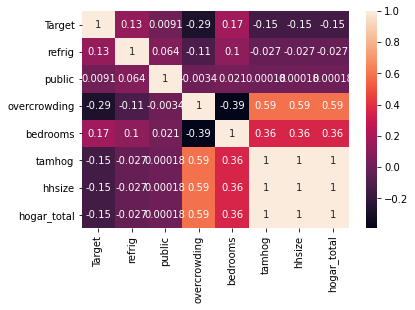

In [ ]:
import seaborn as sns
sns.heatmap(train_heatmap.corr(), annot= True)
# 절댓닶으로 봐야 함
# target열: public(0.0091)->가장 영향을 덜 주는 컬럼, overcrowding(0.29)->가장 영향을 많이 주는 컬럼

## 교육 단계

In [ ]:
train_onehot= pd.get_dummies(train_feature, columns=['tamhog', 'hhsize', 'hogar_total'])
train_onehot.shape
# 겟더미는 판다스, 스케일러는 프리프로세싱

(9557, 44)

In [ ]:
from sklearn import preprocessing
scaler= preprocessing.StandardScaler()
scaler.fit(train_onehot)
X= scaler.transform(train_onehot)
X.shape

(9557, 44)

In [ ]:
Y= train['Target']
Y.shape

(9557,)

In [ ]:
from lightgbm import LGBMClassifier
lgbm= LGBMClassifier()
lgbm.fit(X, Y)

LGBMClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
params= {'max_depth': [10,15,20],
        'min_child_samples': [20,40,60],
        'subsample': [0.8,1],
        }

grid= GridSearchCV(lgbm, param_grid= params) 
# GridSearchCV(모델, 파라매터= 딕셔너리) 

grid.fit(X, Y)
# grid: 파라매터를 바꿔가며 lightgbm 18번 함

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'min_child_samples': [20, 40, 60],
                         'subsample': [0.8, 1]})

In [ ]:
grid.best_score_, grid.best_params_

(0.619021235787524,
 {'max_depth': 15, 'min_child_samples': 40, 'subsample': 0.8})

In [ ]:
lgbm_grid= LGBMClassifier(max_depth= 15, min_child_samples= 40, subsample= 0.8)
# best_params_넣기
lgbm_grid.fit(X, Y)

LGBMClassifier(max_depth=15, min_child_samples=40, subsample=0.8)

In [ ]:
lgbm_grid.score(X, Y)

0.6956157790101496

### Apply KFold
##### class sklearn.model_selection.RepeatedStratifiedKFold(*, n_splits=5, n_repeats=10, random_state=None

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
kf= RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

from sklearn.model_selection import cross_val_score
n_scores= cross_val_score(lgbm_grid, X, Y, scoring= 'accuracy', cv= kf)
n_scores, n_scores.shape

(array([0.68462343, 0.68200837, 0.6881214 , 0.67085296, 0.6729461 ,
        0.67050209, 0.67887029, 0.67974882, 0.6807954 , 0.67765568,
        0.67887029, 0.67939331, 0.6807954 , 0.68341183, 0.67765568,
        0.68462343, 0.68410042, 0.68131868, 0.68184197, 0.67556253,
        0.68776151, 0.67468619, 0.69544741, 0.66771324, 0.68184197]),
 (25,))

In [ ]:
import numpy as np
np.mean(n_scores), np.std(n_scores)

(0.6800459353358338, 0.0059541622077198255)

In [ ]:
lgbm.score(X, Y)
# model, params가 똑같은데 grid.best_score_와 다른 이유? 
# subsample= 0.8만 줘서 데이터 양이 다름

0.6987548393847441

In [ ]:
lgbm_grid.feature_importances_

array([ 543,  789, 3249, 3300, 1780,  159,  310,  313,  466,  369,  249,
        161,  141,  104,   59,    8,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

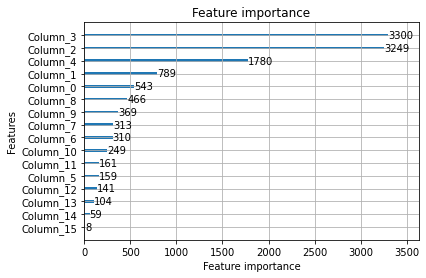

In [ ]:
from lightgbm import plot_importance
plot_importance(lgbm_grid)
# X의 컬럼 이름 순서 = columns 0~15

In [ ]:
Y_pred= lgbm_grid.predict(X)
# 원래 값과 예측한 값을 비교하기. f1-score
from sklearn import metrics
print(metrics.classification_report(Y, Y_pred))
# print하면 더 깔끔하게 나옴
# f1-score의 accuracy확인

              precision    recall  f1-score   support

           1       0.78      0.26      0.39       755
           2       0.54      0.32      0.40      1597
           3       0.72      0.15      0.25      1209
           4       0.71      0.96      0.82      5996

    accuracy                           0.70      9557
   macro avg       0.69      0.42      0.46      9557
weighted avg       0.69      0.70      0.64      9557

